In [1]:
%pylab inline
from ipywidgets import interact
import scipy.sparse as scsp
import scipy.sparse.linalg as scspl
from topobp import *

Populating the interactive namespace from numpy and matplotlib


# Topological insulators II/02: Proximity, poorman's Majorana and experiment

## Model a two site proximity effect in Fock space and empliying the Bogoliubov–de Gennes approach

### Fock

In [2]:
# construct the c operators; Nsp stands for the number of single-particle states, 
# that is 4 for our 4-site T-junction
Nsp = 4;
c = fermion_Fock_matrices(Nsp,dense=True);

In [3]:
def Minimal_Proximity_Fock_Ham(Delta,t):
    ham=Delta*c[0]*c[1]+t*(c[2].H*c[0]+c[3].H*c[1])
    ham=ham+ham.H
    return ham

In [4]:
tran=linspace(0,2,100)
datFock=[]
for t in tran:
    datFock.append(eigvalsh(Minimal_Proximity_Fock_Ham(1,t)))

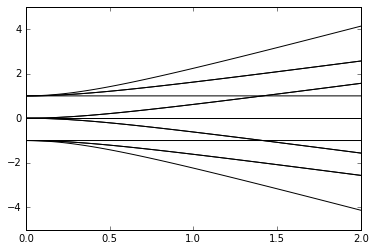

In [5]:
plot(tran,datFock,'k-');

### BdG

In [6]:
def Minimal_Proximity_BdG_Ham(Delta,t):
    ham=matrix([[0     ,0     ,0     ,Delta,t,0,0,0],
                [0     ,0     ,-Delta,0    ,0,-t,0,0],
                [0     ,-Delta,0     ,0    ,0,0,t,0],
                [Delta ,0     ,0     ,0    ,0,0,0,-t],
                [t     ,0     ,0     ,0    ,0,0,0,0],
                [0     ,-t    ,0     ,0    ,0,0,0,0],
                [0     ,0     ,t     ,0    ,0,0,0,0],
                [0     ,0     ,0     ,-t   ,0,0,0,0]
                ])
    return ham

In [24]:
tran=linspace(0,2,100)
datBdG=[]
datexFock=[]
for t in tran:
    datBdG.append(eigvalsh(Minimal_Proximity_BdG_Ham(1,t)))
    fockdata=eigvalsh(Minimal_Proximity_Fock_Ham(1,t))   
    datexFock.append(fockdata-fockdata[0])

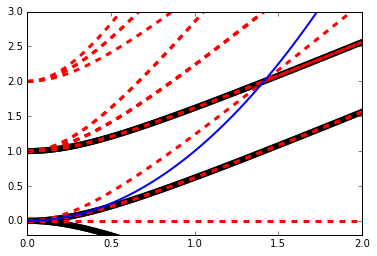

In [32]:
plot(tran,datBdG,'k-',lw=6);
plot(tran,datexFock,'r--',lw=3);
plot(tran,tran**2,'b-',lw=2)
ylim(-0.2,3);

## Implement the poorman's Majorana system

## Calculate the phase diagram of the Lutchyn wire by counting zero modes of a BdG model